# 1. Data Loading

In [1]:
STATE=34

In [2]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR = os.path.join(os.getcwd(), 'dataset')
OUTPUT_DIR = os.path.join(os.getcwd(), 'output')
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [3]:
train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
target = pd.read_csv(os.path.join(DATA_DIR, 'target.csv'))
test = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))

In [4]:
train["target"] = target["coppaRisk"]
train["target"] = train["target"].astype(int)

# 2. Data Description

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   developerCountry                 7000 non-null   object 
 1   countryCode                      6936 non-null   object 
 2   userRatingCount                  7000 non-null   int64  
 3   primaryGenreName                 7000 non-null   object 
 4   downloads                        4851 non-null   object 
 5   deviceType                       7000 non-null   object 
 6   hasPrivacyLink                   6250 non-null   object 
 7   hasTermsOfServiceLink            2365 non-null   object 
 8   hasTermsOfServiceLinkRating      2365 non-null   object 
 9   isCorporateEmailScore            5872 non-null   float64
 10  adSpent                          1321 non-null   float64
 11  appAge                           6950 non-null   float64
 12  averageUserRating   

In [6]:
train.describe(include='all')

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,target
count,7000,6936,7.000000e+03,7000,4851,7000,6250,2365,2365,5872.000000,1.321000e+03,6950.000000,5768.000000,838,7000,7000,7000.000000
unique,114,119,NaN,46,26,5,2,2,2,NaN,NaN,NaN,NaN,3,3,3,NaN
top,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,NaN,Games,100 - 500,GLOBAL,True,False,high,NaN,NaN,NaN,NaN,medium,low,low,NaN
freq,4338,5802,NaN,1828,699,6045,6189,1424,1424,NaN,NaN,NaN,NaN,536,5652,6983,NaN
mean,NaN,NaN,3.256274e+04,NaN,NaN,NaN,NaN,NaN,NaN,45.740293,3.977563e+03,57.093060,2.482490,NaN,NaN,NaN,0.099429
std,NaN,NaN,5.501431e+05,NaN,NaN,NaN,NaN,NaN,NaN,49.361215,9.219919e+04,37.169895,1.905712,NaN,NaN,NaN,0.299258
min,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,7.038525e-03,0.533333,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.086920e+00,27.533333,0.000000,NaN,NaN,NaN,0.000000
50%,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,7.945580e+00,52.866667,3.000000,NaN,NaN,NaN,0.000000
75%,NaN,NaN,8.800000e+01,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,4.908375e+01,80.000000,4.000000,NaN,NaN,NaN,0.000000


In [7]:
test.describe(include='all')

,ID,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating
count,3000.000000,3000,2971,3.000000e+03,3000,2119,3000,2684,1039,1039,2560.000000,574.000000,2983.000000,2486.000000,329,3000,3000
unique,NaN,89,92,NaN,45,21,5,2,2,2,NaN,NaN,NaN,NaN,3,3,3
top,NaN,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,NaN,Games,100 - 500,GLOBAL,True,False,high,NaN,NaN,NaN,NaN,medium,low,low
freq,NaN,1821,2470,NaN,805,334,2603,2652,643,643,NaN,NaN,NaN,NaN,213,2451,2996
mean,5016.298333,NaN,NaN,3.576905e+04,NaN,NaN,NaN,NaN,NaN,NaN,46.444922,286.612276,56.044396,2.490748,NaN,NaN,NaN
std,2894.991128,NaN,NaN,4.455556e+05,NaN,NaN,NaN,NaN,NaN,NaN,49.415285,1890.997697,36.417410,1.896230,NaN,NaN,NaN
min,1.000000,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.007450,-1.200000,0.000000,NaN,NaN,NaN
25%,2495.750000,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.121507,26.933333,0.000000,NaN,NaN,NaN
50%,4969.500000,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,7.186537,51.933333,3.000000,NaN,NaN,NaN
75%,7585.500000,NaN,NaN,8.250000e+01,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,44.878463,77.750000,4.000000,NaN,NaN,NaN


In [8]:
train.head()

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,target
0,NORWAY,RO,127731,Sports,NaN,smartphone,True,True,low,99.0,14.017220,160.400000,4.0,medium,low,low,0
1,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Medical,50 - 100,GLOBAL,True,NaN,NaN,99.0,NaN,17.500000,0.0,NaN,low,low,0
2,UNITED ARAB EMIRATES,CZ,51143,Games,50000000 - 100000000,GLOBAL,True,True,low,0.0,31.883163,30.766667,4.0,NaN,low,low,0
3,GERMANY,GLOBAL,1074,Games,NaN,GLOBAL,True,NaN,NaN,99.0,NaN,71.533333,4.0,NaN,low,low,0
4,CANNOT IDENTIFY COUNTRY,GLOBAL,17,Tools,1000 - 5000,GLOBAL,True,NaN,NaN,99.0,NaN,52.400000,4.0,NaN,low,low,0


In [9]:
test.head()

,ID,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating
0,2807,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,2,Medical,NaN,GLOBAL,True,NaN,NaN,NaN,NaN,81.600000,5.0,NaN,low,low
1,1742,ICELAND,EMEA,0,Games,5000 - 10000,GLOBAL,True,True,low,0.0,0.027742,24.700000,0.0,NaN,low,low
2,806,UNITED STATES,RU,13059,Games,NaN,smartphone,True,False,high,99.0,9.249056,40.300000,4.0,NaN,low,low
3,2635,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Games,NaN,GLOBAL,True,False,high,NaN,NaN,39.233333,0.0,NaN,medium,low
4,9047,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Shopping,NaN,GLOBAL,NaN,NaN,NaN,NaN,NaN,65.533333,0.0,NaN,low,low


In [10]:
train.isnull().sum()

developerCountry                      0
countryCode                          64
userRatingCount                       0
primaryGenreName                      0
downloads                          2149
deviceType                            0
hasPrivacyLink                      750
hasTermsOfServiceLink              4635
hasTermsOfServiceLinkRating        4635
isCorporateEmailScore              1128
adSpent                            5679
appAge                               50
averageUserRating                  1232
appContentBrandSafetyRating        6162
appDescriptionBrandSafetyRating       0
mfaRating                             0
target                                0
dtype: int64

In [11]:
test.isnull().sum()

ID                                    0
developerCountry                      0
countryCode                          29
userRatingCount                       0
primaryGenreName                      0
downloads                           881
deviceType                            0
hasPrivacyLink                      316
hasTermsOfServiceLink              1961
hasTermsOfServiceLinkRating        1961
isCorporateEmailScore               440
adSpent                            2426
appAge                               17
averageUserRating                   514
appContentBrandSafetyRating        2671
appDescriptionBrandSafetyRating       0
mfaRating                             0
dtype: int64

# 3. Exploratory Data Analysis

## Categorical and Numerical Cols

In [12]:
cat_cols = train.select_dtypes(include=['object']).columns
num_cols = train.select_dtypes(exclude=['object']).columns

In [13]:
print(f"Categorical columns: {cat_cols}")
print(f"Numerical columns: {num_cols}")

Categorical columns: Index(['developerCountry', 'countryCode', 'primaryGenreName', 'downloads',
       'deviceType', 'hasPrivacyLink', 'hasTermsOfServiceLink',
       'hasTermsOfServiceLinkRating', 'appContentBrandSafetyRating',
       'appDescriptionBrandSafetyRating', 'mfaRating'],
      dtype='object')
Numerical columns: Index(['userRatingCount', 'isCorporateEmailScore', 'adSpent', 'appAge',
       'averageUserRating', 'target'],
      dtype='object')


## Target Distribution

<Axes: xlabel='target'>

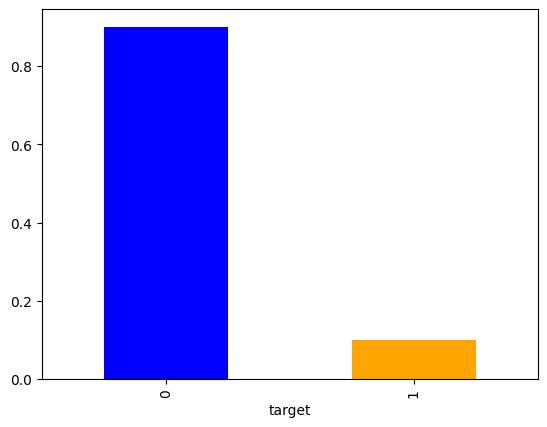

In [14]:
train['target'].value_counts(normalize=True).plot(kind='bar', color=['blue', 'orange'])

In [15]:
train['target'].value_counts()

target
0    6304
1     696
Name: count, dtype: int64

## Numerical Correlations

Text(0.5, 1.0, 'Correlation Heatmap')

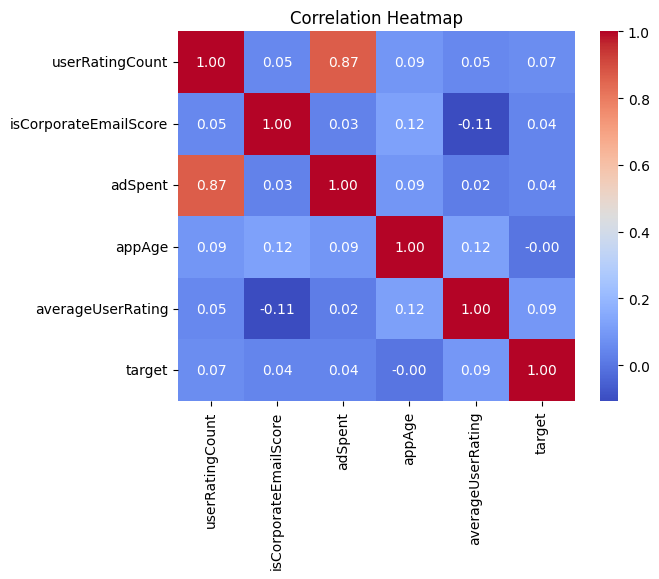

In [16]:
sns.heatmap(train[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')

## Pairplot

In [17]:
# sns.pairplot(train, hue='target', palette='coolwarm')

## User Rating Count

In [18]:
train["userRatingCount"].value_counts()

userRatingCount
0        3338
1         238
6         123
5         117
7         100
         ... 
40168       1
855         1
11408       1
5588        1
4606        1
Name: count, Length: 1528, dtype: int64

In [19]:
test["userRatingCount"].value_counts()

userRatingCount
0       1414
1         89
6         68
5         52
2         45
        ... 
204        1
5527       1
61         1
1022       1
7166       1
Name: count, Length: 763, dtype: int64

# 4. Preprocessing

In [20]:
preproc = train.copy()

In [21]:
for col in num_cols:
        preproc[col] = preproc[col].fillna(preproc[col].median())

## One Hot Encoding

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
print(cat_cols)

Index(['developerCountry', 'countryCode', 'primaryGenreName', 'downloads',
       'deviceType', 'hasPrivacyLink', 'hasTermsOfServiceLink',
       'hasTermsOfServiceLinkRating', 'appContentBrandSafetyRating',
       'appDescriptionBrandSafetyRating', 'mfaRating'],
      dtype='object')


In [24]:
preproc[cat_cols] = preproc[cat_cols].astype('str')

In [25]:
one_coder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
one_hot_encoded = one_coder.fit_transform(preproc[cat_cols])
one_hot_df = pd.DataFrame(one_hot_encoded,columns=one_coder.get_feature_names_out(cat_cols))
preproc.drop(cat_cols,axis=1,inplace=True)
preproc = pd.concat([preproc,one_hot_df],axis=1)

In [26]:
# preproc.drop("userRatingCount",axis=1,inplace=True)

In [27]:
preproc.head()

,userRatingCount,isCorporateEmailScore,adSpent,appAge,averageUserRating,target,developerCountry_ADDRESS NOT LISTED IN PLAYSTORE,developerCountry_ALBANIA,developerCountry_ALGERIA,developerCountry_ANDORRA,...,appContentBrandSafetyRating_high,appContentBrandSafetyRating_low,appContentBrandSafetyRating_medium,appContentBrandSafetyRating_nan,appDescriptionBrandSafetyRating_high,appDescriptionBrandSafetyRating_low,appDescriptionBrandSafetyRating_medium,mfaRating_high,mfaRating_low,mfaRating_medium
0,127731,99.0,14.017220,160.400000,4.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,99.0,7.945580,17.500000,0.0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,51143,0.0,31.883163,30.766667,4.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1074,99.0,7.945580,71.533333,4.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,17,99.0,7.945580,52.400000,4.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


# 5. Modelling

## Train test split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = preproc.drop(columns=['target'])
y = preproc['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=STATE)

## XGBoost

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [31]:
xgb_params = {
    'eval_metric': 'auc',
    'learning_rate': 0.05,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state':STATE
}

In [32]:
xgb = XGBClassifier(**xgb_params,objective='binary:logistic')

In [37]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict_proba(X_val)[:, 1]
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_val, y_pred_binary))
print(f"Accuracy: {accuracy_score(y_val, y_pred_binary)}")
print(f"ROC AUC: {roc_auc_score(y_val, y_pred)}")

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1266
           1       0.34      0.07      0.12       134

    accuracy                           0.90      1400
   macro avg       0.63      0.53      0.53      1400
weighted avg       0.86      0.90      0.87      1400

Accuracy: 0.8978571428571429
ROC AUC: 0.8856635071090048


## Optuna Tuning

In [45]:
import optuna
from optuna.samplers import TPESampler

In [49]:
def objective(trial):

    param = {
        "verbosity": 0,
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    try_model = XGBClassifier(**param, random_state=STATE, eval_metric="auc",objective='binary:logistic'
                              , early_stopping_rounds=100, n_estimators=1000)
    try_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    y_pred = try_model.predict_proba(X_val)[:, 1]
    return roc_auc_score(y_val, y_pred)


In [50]:
optuna.logging.set_verbosity(optuna.logging.INFO)

sampler = TPESampler(seed=1)

In [51]:
study = optuna.create_study(study_name="xgb", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100)

[I 2025-04-12 01:26:12,806] A new study created in memory with name: xgb
[I 2025-04-12 01:26:13,834] Trial 0 finished with value: 0.857218646105963 and parameters: {'booster': 'gblinear', 'lambda': 2.622168410226067e-06, 'alpha': 1.492956405760975e-07, 'subsample': 0.2738708758150383, 'colsample_bytree': 0.3490081691021367}. Best is trial 0 with value: 0.857218646105963.
[I 2025-04-12 01:26:21,977] Trial 1 finished with value: 0.8846997241281743 and parameters: {'booster': 'dart', 'lambda': 2.257127620305132e-05, 'alpha': 0.0030321871516973044, 'subsample': 0.36356179978521397, 'colsample_bytree': 0.9024939491127564, 'max_depth': 3, 'min_child_weight': 8, 'eta': 2.1799092736448257e-05, 'gamma': 0.0002947939915624361, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.10259193433611967, 'skip_drop': 0.14350046489008147}. Best is trial 1 with value: 0.8846997241281743.
[I 2025-04-12 01:26:28,668] Trial 2 finished with value: 0.89035568602485

In [52]:
#evaluate the trial
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value:  0.8941400815826083
  Params: 
    booster: dart
    lambda: 0.05364451015501549
    alpha: 1.6571110903078424e-07
    subsample: 0.5464225314950871
    colsample_bytree: 0.9980101216086936
    max_depth: 7
    min_child_weight: 8
    eta: 1.0625385870745005e-05
    gamma: 0.0013053462493411903
    grow_policy: depthwise
    sample_type: weighted
    normalize_type: tree
    rate_drop: 0.00039244713872364323
    skip_drop: 6.520002030728989e-08


In [54]:
# tuned_params = trial.params
tuned_params= {
    "booster": "dart",
    "lambda": 0.05364451015501549,
    "alpha": 1.6571110903078424e-07,
    "subsample": 0.5464225314950871,
    "colsample_bytree": 0.9980101216086936,
    "max_depth": 7,
    "min_child_weight": 8,
    "eta": 1.0625385870745005e-05,
    "gamma": 0.0013053462493411903,
    "grow_policy": "depthwise",
    "sample_type": "weighted",
    "normalize_type": "tree",
    "rate_drop": 0.00039244713872364323,
    "skip_drop": 6.520002030728989e-08,
}

In [55]:
fin_xgb = XGBClassifier(**tuned_params, random_state=STATE, eval_metric="auc",objective='binary:logistic'
                              , early_stopping_rounds=100, n_estimators=1000)

In [56]:
fin_xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
y_pred = fin_xgb.predict_proba(X_val)[:, 1]
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_val, y_pred_binary))
print(f"Accuracy: {accuracy_score(y_val, y_pred_binary)}")
print(f"ROC AUC: {roc_auc_score(y_val, y_pred)}")

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1266
           1       0.00      0.00      0.00       134

    accuracy                           0.90      1400
   macro avg       0.45      0.50      0.47      1400
weighted avg       0.82      0.90      0.86      1400

Accuracy: 0.9042857142857142
ROC AUC: 0.8889615901534978


c:\Users\Warge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Warge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Warge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Feature Importance

In [57]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': fin_xgb.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Fitur Terpenting:")
print(feature_importance.head(10))


Top 10 Fitur Terpenting:
                                 Feature  Importance
249           primaryGenreName_Education    0.335907
254               primaryGenreName_Games    0.328327
331  appDescriptionBrandSafetyRating_low    0.070952
1                  isCorporateEmailScore    0.043273
250       primaryGenreName_Entertainment    0.033978
321           hasTermsOfServiceLink_True    0.029892
0                        userRatingCount    0.027101
314                deviceType_smartphone    0.022365
2                                adSpent    0.021033
312                    deviceType_GLOBAL    0.010738


## Shap Analysis

In [38]:
import shap

c:\Users\Warge\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [58]:
explainer = shap.Explainer(fin_xgb)
shap_values = explainer.shap_values(X_val)

In [59]:
shap_exp = explainer(X_val)

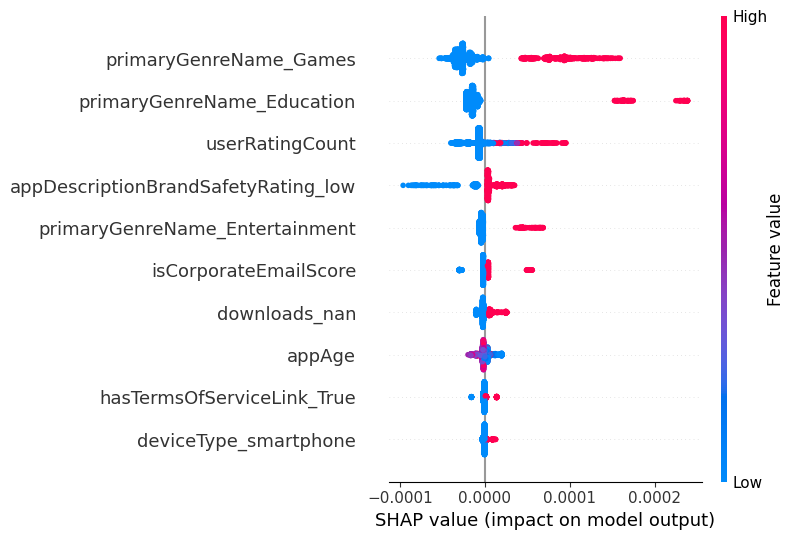

In [60]:
shap.summary_plot(shap_exp, X_val,max_display=10)

# 6. Prediction

In [61]:
fin_test = test.copy()
fin_test.drop(columns=['ID'], inplace=True)

In [62]:
for col in num_cols:
    if col != 'target':
        fin_test[col] = fin_test[col].fillna(fin_test[col].median())
fin_test[cat_cols] = fin_test[cat_cols].astype('str')
fin_enc = one_coder.transform(fin_test[cat_cols])
fin_oh = pd.DataFrame(fin_enc,columns=one_coder.get_feature_names_out(cat_cols))
fin_test.drop(cat_cols,axis=1,inplace=True)
fin_test = pd.concat([fin_test,fin_oh],axis=1)

In [63]:
preds = fin_xgb.predict_proba(fin_test)[:, 1]
submission = pd.DataFrame({
    'ID': test['ID'],
    'coppaRisk': preds
})

# 7. Submission

In [64]:
submission.to_csv(os.path.join(OUTPUT_DIR, 'submission3.csv'), index=False)
print("Submission file created successfully.")

Submission file created successfully.
